In [1]:
#Import library yang dibutuhkan
import csv
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, ArrayDictionary
import string

In [9]:
dfMs = pd.read_csv("C:/Users/HP/Documents/Senada/data/taudata-Brand-Monitoring-GanttChart - 2.2 Data-MedSos.csv")
dfMm = pd.read_csv("C:/Users/HP/Documents/Senada/data/taudata-Brand-Monitoring-GanttChart - 2.2 Data Media.csv")

In [10]:
print(len(dfMs))
print(len(dfMm))

14280
14654


In [11]:
# dfMs = dfMs.drop_duplicates(subset=["link"])
# dfMs = dfMs.reset_index(drop=True)
dfMs['text'] = dfMs['title'] + ' ' + dfMs['snippet']
# dfMs.to_csv('revisi_ms.csv', index=False)
# dfMm = dfMm.drop_duplicates(subset=["link"])
# dfMm = dfMm.reset_index(drop=True)
dfMm['text'] = dfMm['title'] + ' ' + dfMm['snippet']
# dfMm.to_csv('revisi_mm.csv', index=False)

In [12]:
# import pandas as pd
# import collections
# import re
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# from textblob import TextBlob
# from unidecode import unidecode
# from collections import Counter
# from tqdm import tqdm


# def cleansing(data_tweet):
#     # Remove URL
#     def remove_url(text):
#         url_pattern = re.compile(r"https?://\S+")
#         return url_pattern.sub(r"", text)
#     data_tweet["text"] = data_tweet["text"].apply(lambda x: remove_url(x))

#     # Lowercasing
#     data_tweet["lowercase"] = data_tweet['text'].apply(lambda x: x.lower())

#     # Unicode normalization
#     data_tweet["lowercase"] = data_tweet["lowercase"].apply(lambda x: unidecode(x))

#     # Punctuation removal
#     data_tweet["lowercase"] = data_tweet["lowercase"].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#     # Tokenization
#     data_tweet["token"] = data_tweet["lowercase"].apply(lambda x: word_tokenize(x))

#     # Removal of words less than 3 characters
#     data_tweet["token"] = data_tweet["token"].apply(lambda x: [t for t in x if len(t) >= 3])

#     # Joining tokenized words into cleaned text
#     data_tweet["cleaned_text"] = data_tweet["token"].apply(lambda tokens: ' '.join(tokens))

#     # Selecting columns 'text', 'label', and 'cleaned_text'
#     data_tweet = data_tweet[['text', 'aspek', 'cleaned_text']]

#     return data_tweet

# # # Clean data for train and test
# dfMs = cleansing(dfMs)

In [13]:
dfMs

,id_,entity,timeStart,totalResults,likes,username,name,gender,sentiment,bidang,medianame,title,snippet,link,aspek,pagemap,text
0,9238,Honda,2023-02-19 0:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,linkedin,PT Pertamina (Persero) on LinkedIn: #managemen...,Salam HONDA lovers Mau credit mobil honda Yuk ...,https://fi.linkedin.com/posts/pertamina_manage...,NaN,{'cse_thumbnail': [{'src': 'https://encrypted-...,PT Pertamina (Persero) on LinkedIn: #managemen...
1,9331,Honda,2023-02-20 0:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,linkedin,PT Pertamina (Persero) on LinkedIn: #managemen...,Salam HONDA lovers Mau credit mobil honda Yuk ...,https://fi.linkedin.com/posts/pertamina_manage...,NaN,{'cse_thumbnail': [{'src': 'https://encrypted-...,PT Pertamina (Persero) on LinkedIn: #managemen...
2,14078,Wuling,2023-04-10 0:00:00,4,NaN,Bramwulingprabumulih,NaN,NaN,NaN,NaN,facebook,Mobil wuling Prabumuliih | Prabumulih,MARET LOVE EXTRA DISCOUNT BERSAMA WULING DISKO...,https://hi-in.facebook.com/Bramwulingprabumulih,NaN,{'cse_thumbnail': [{'src': 'https://encrypted-...,Mobil wuling Prabumuliih | Prabumulih MARET LO...
3,5713,Daihatsu,2023-01-06 0:00:00,1,NaN,daihatsuindonesia,NaN,NaN,NaN,NaN,facebook,Salah satu fitur yang penting... - Daihatsu In...,Salah satu fitur yang penting tersedia di dala...,https://hi-in.facebook.com/daihatsuindonesia/p...,NaN,{'cse_thumbnail': [{'src': 'https://encrypted-...,Salah satu fitur yang penting... - Daihatsu In...
4,5793,Daihatsu,2023-01-07 0:00:00,1,NaN,daihatsuindonesia,NaN,NaN,NaN,NaN,facebook,Salah satu fitur yang penting... - Daihatsu In...,Salah satu fitur yang penting tersedia di dala...,https://hi-in.facebook.com/daihatsuindonesia/p...,NaN,{'cse_thumbnail': [{'src': 'https://encrypted-...,Salah satu fitur yang penting... - Daihatsu In...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,14468,Toyota,2023-04-13 0:00:00,180,NaN,NaN,NaN,NaN,NaN,NaN,youtube,Hasil Pemasangan Advanced Module Spion Lipat O...,Hasil Pemasangan Advanced Module Spion Lipat O...,https://www.youtube.com/watch?v=ZtOZPX4qCLI,NaN,{'cse_thumbnail': [{'src': 'https://encrypted-...,Hasil Pemasangan Advanced Module Spion Lipat O...
14276,16886,Toyota,2023-05-06 0:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,youtube,HARGA MOBIL TOYOTA KIJANG INNOVA BEKAS MURAH 3...,HARGA MOBIL BEKAS TOYOTA KIJANG INNOVA BERIKUT...,https://www.youtube.com/watch?v=zvBV_guBmdQ,NaN,{'cse_thumbnail': [{'src': 'https://encrypted-...,HARGA MOBIL TOYOTA KIJANG INNOVA BEKAS MURAH 3...
14277,12862,Suzuki,2023-03-28 0:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,youtube,MOBIL SUZUKI ESCUDO HANYA 25 JUTA RUPIAH - INF...,MOBIL SUZUKI ESCUDO HANYA 25 JUTA RUPIAH - INF...,https://www.youtube.com/watch?v=ZwNODhFInc4,NaN,{'cse_thumbnail': [{'src': 'https://encrypted-...,MOBIL SUZUKI ESCUDO HANYA 25 JUTA RUPIAH - INF...
14278,17440,Honda,2023-05-12 0:00:00,957,18000.0,reel,NaN,NaN,NaN,NaN,instagram,Jakarta Mengaji | Inilah dahsyatnya efek shola...,"KONSUMEN INI MAUNYA KREDIT TANPA RIBA, KARENA ...",https://z-p3.www.instagram.com/reel/CsMyVa1s9R...,NaN,{'cse_thumbnail': [{'src': 'https://encrypted-...,Jakarta Mengaji | Inilah dahsyatnya efek shola...


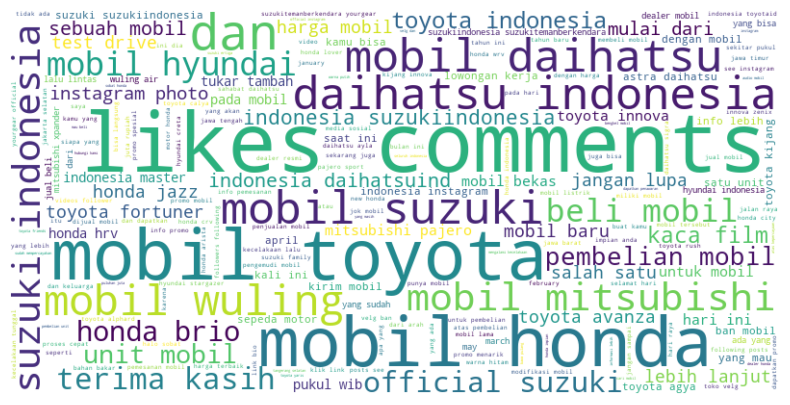

In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the text in the cleaned_text column into a single string
text = ' '.join(dfMs['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
dfMm

,id_,entity,mediaName,timeStart,mediaURL,title,snippet,link,Aspek,pagemap,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,text
0,18,Daihatsu,Dapur Pacu,2023-01-01 0:00:00,https://dapurpacu.id/,Daihatsu Terus Pantau Pelestarian Penyu di Kon...,2 Jan 2023 ... Untuk mewujudkan salah satu pro...,https://dapurpacu.id/2023/01/02/daihatsu-terus...,Ramah Lingkungan,{'cse_thumbnail': [{'src': 'https://encrypted-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daihatsu Terus Pantau Pelestarian Penyu di Kon...
1,24819,Daihatsu,Dapur Pacu,2023-01-01 0:00:00,dapurpacu.id,Daihatsu Terus Pantau Pelestarian Penyu di Kon...,2 Jan 2023 ... Untuk mewujudkan salah satu pro...,https://dapurpacu.id/2023/01/02/daihatsu-terus...,Ramah Lingkungan,{'cse_thumbnail': [{'src': 'https://encrypted-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daihatsu Terus Pantau Pelestarian Penyu di Kon...
2,212,Wuling,Moladin,2023-01-01 0:00:00,https://moladin.com/blog/,"Honda N-Van EV Meluncur 2024, Mobil Listrik Mu...","2 Jan 2023 ... Honda N-Van EV Meluncur 2024, M...",https://moladin.com/blog/honda-n-van-ev-melunc...,Biaya,"{'hcard': [{'url_text': 'Baghendra Lodra', 'fn...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Honda N-Van EV Meluncur 2024, Mobil Listrik Mu..."
3,41,Wuling,DetikOto,2023-01-01 0:00:00,https://oto.detik.com/,"Wuling Air EV Bekas KT G20 Dijual Murah, Laku ...",2 Jan 2023 ... Wuling Air ev bekas KTT G20 ban...,https://oto.detik.com/berita/d-6494675/wuling-...,Biaya,{'cse_thumbnail': [{'src': 'https://encrypted-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wuling Air EV Bekas KT G20 Dijual Murah, Laku ..."
4,24831,Wuling,DetikOto,2023-01-01 0:00:00,oto.detik.com,"Wuling Air EV Bekas KT G20 Dijual Murah, Laku ...",2 Jan 2023 ... Wuling Air ev bekas KTT G20 ban...,https://oto.detik.com/berita/d-6494675/wuling-...,Biaya,{'cse_thumbnail': [{'src': 'https://encrypted-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wuling Air EV Bekas KT G20 Dijual Murah, Laku ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14649,44117,Toyota,Otomotif Kompas,2023-07-28 0:00:00,otomotif.kompas.com,"Home Charger Toyota bZ4X Tak Berfungsi, Ini Pe...","28 Jul 2023 ... ""Terutama banyak customer yang...",https://otomotif.kompas.com/read/2023/07/28/11...,Keselamatan,{'cse_thumbnail': [{'src': 'https://encrypted-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Home Charger Toyota bZ4X Tak Berfungsi, Ini Pe..."
14650,44123,Mitsubishi,Otomotif Kompas,2023-07-28 0:00:00,otomotif.kompas.com,Mitsubishi Triton Versi Hybrid Dalam Tahap Pen...,28 Jul 2023 ... Sementara Triton listrik sedan...,https://otomotif.kompas.com/read/2023/07/28/16...,Ramah Lingkungan,{'cse_thumbnail': [{'src': 'https://encrypted-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mitsubishi Triton Versi Hybrid Dalam Tahap Pen...
14651,44114,Toyota,Otomotif Kompas,2023-07-28 0:00:00,otomotif.kompas.com,"Modifikasi Toyota GR Yaris, Pakai Bodykit Supe...",29 Jul 2023 ... Toyota GR Yaris dimodifikasi d...,https://otomotif.kompas.com/read/2023/07/29/10...,Ramah Lingkungan,{'cse_thumbnail': [{'src': 'https://encrypted-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Modifikasi Toyota GR Yaris, Pakai Bodykit Supe..."
14652,44113,Toyota,Otomotif Kompas,2023-07-28 0:00:00,otomotif.kompas.com,"Modal Rp 30 Jutaan, Upgrade Toyota Fortuner La...",29 Jul 2023 ... Bengkel modifikasi bernama JAC...,https://otomotif.kompas.com/read/2023/07/29/11...,Biaya,{'cse_thumbnail': [{'src': 'https://encrypted-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Modal Rp 30 Jutaan, Upgrade Toyota Fortuner La..."


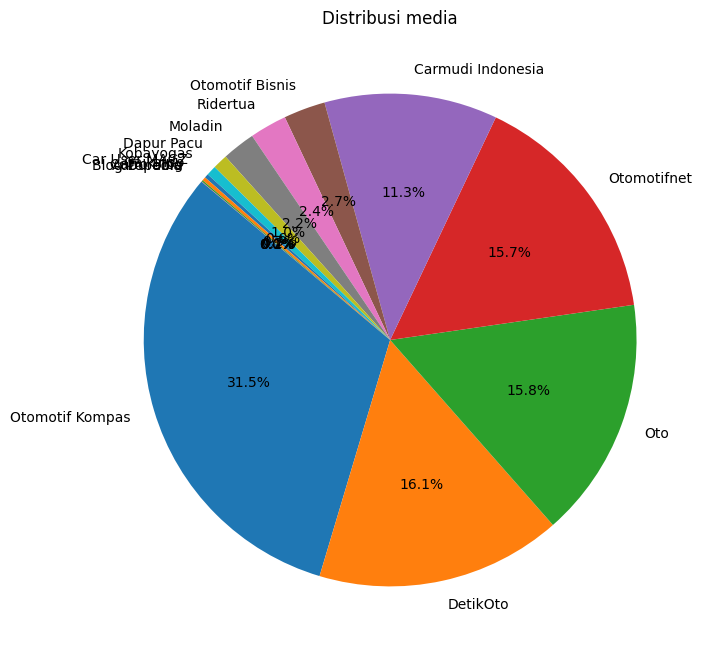

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung frekuensi setiap aspek
aspek_counts = dfMm['mediaName'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(aspek_counts, labels=aspek_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi platform')
plt.show()

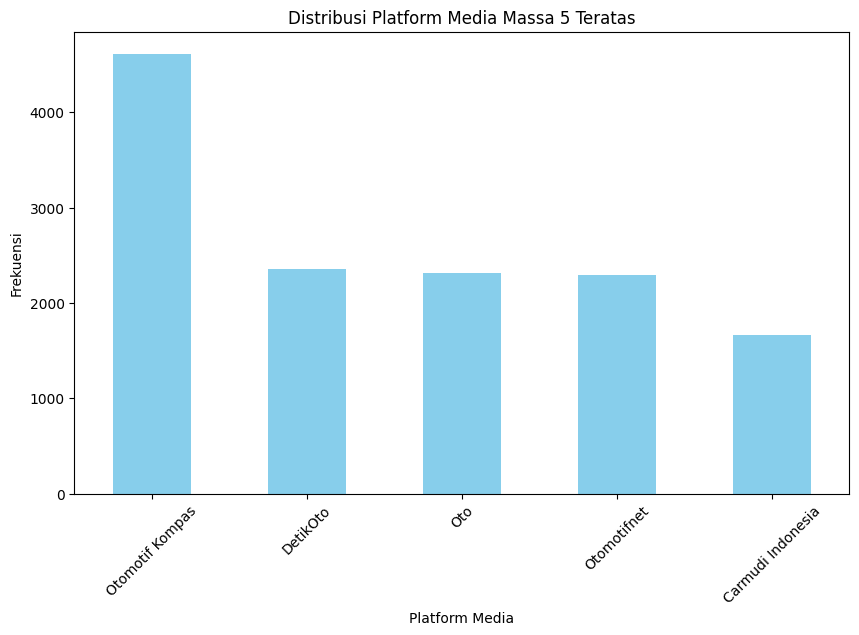

In [32]:
# Menghitung frekuensi setiap aspek
aspek_counts = dfMm['mediaName'].value_counts()
aspek_counts = aspek_counts.head(5)
# Membuat bar chart
plt.figure(figsize=(10, 6))
aspek_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Platform Media')
plt.ylabel('Frekuensi')
plt.title('Distribusi Platform Media Massa 5 Teratas')
plt.xticks(rotation=45)
plt.show()

In [6]:
dfMs = dfMs.rename(columns={'timestart': 'date'})
# Ubah kolom 'date' menjadi format datetime
dfMs['date'] = pd.to_datetime(dfMs['date'])

# Mengubah format menjadi 'tanggal Bulan Tahun'
dfMs['date'] = dfMs['date'].apply(lambda x: x.strftime('%d %B %Y'))
# Mengambil 3 kata pertama dari setiap teks dalam kolom 'snippet'
dfMm['date'] = dfMm['snippet'].apply(lambda x: ' '.join(x.split()[:3]) if len(x.split()) >= 3 else x)
# Membuat dictionary untuk mapping nama bulan ke angka bulan
month_mapping = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
    'Mei': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
    'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}

# Memetakan nama bulan dengan menggunakan map
dfMm['date'] = dfMm['date'].apply(lambda x: ' '.join([x.split()[0], month_mapping.get(x.split()[1], x.split()[1]), x.split()[2]]) if len(x.split()) >= 3 else x)

# Ubah kolom 'date' ke dalam format datetime
dfMm['date'] = pd.to_datetime(dfMm['date'], errors='coerce', format='%d %m %Y')
# Format date as 'dd Month yyyy'
dfMm['date'] = dfMm['date'].dt.strftime('%d %B %Y')

In [7]:
# dfMs = dfMs.drop_duplicates(subset=["link"])
# dfMs = dfMs.reset_index(drop=True)
dfMs['text'] = dfMs['title'] + ' ' + dfMs['snippet']
# dfMs.to_csv('revisi_ms.csv', index=False)
# dfMm = dfMm.drop_duplicates(subset=["link"])
# dfMm = dfMm.reset_index(drop=True)
dfMm['text'] = dfMm['title'] + ' ' + dfMm['snippet']
# dfMm.to_csv('revisi_mm.csv', index=False)

In [7]:
dfMm.columns = dfMm.columns.str.lower()
dfMs.columns = dfMs.columns.str.lower()
dfMm =  dfMm[['medianame', 'date', 'title','snippet','link','aspek']]
dfMs =  dfMs[['medianame', 'date', 'title','snippet','link','aspek']]

In [5]:
df = pd.concat([dfMm, dfMs], ignore_index=True)
df = df.drop_duplicates(subset=["link"])
df = df.reset_index(drop=True)
df['text'] = df['title'] + ' ' + df['snippet']
df.to_csv('revisi.csv', index=False)

In [6]:
df

,text,aspek
0,Daihatsu Terus Pantau Pelestarian Penyu di Kon...,Ramah Lingkungan
1,"Honda N-Van EV Meluncur 2024, Mobil Listrik Mu...",Biaya
2,"Wuling Air EV Bekas KT G20 Dijual Murah, Laku ...",Biaya
3,Daihatsu Bakal Luncurkan Sedan Kembaran Vios d...,0
4,"Tutorial Parkir Paralel Wuling Air ev, Nggak S...",Fitur
...,...,...
12779,Info Mobil Suzuki carry Bekas Termurah Hanya 1...,NaN
12780,Hasil Pemasangan Advanced Module Spion Lipat O...,NaN
12781,HARGA MOBIL TOYOTA KIJANG INNOVA BEKAS MURAH 3...,NaN
12782,MOBIL SUZUKI ESCUDO HANYA 25 JUTA RUPIAH - INF...,NaN


In [10]:
#Membuka file data tweets
data_tweet = pd.read_csv("C:/Users/HP/Documents/Senada/text-preprocesing/revisi_ms.csv", encoding='latin-1')
data_tweet = data_tweet.astype(str)

In [11]:
data_tweet

,medianame,date,title,snippet,link,aspek,text
0,linkedin,19 February 2023,PT Pertamina (Persero) on LinkedIn: #managemen...,Salam HONDA lovers Mau credit mobil honda Yuk ...,https://fi.linkedin.com/posts/pertamina_manage...,nan,PT Pertamina (Persero) on LinkedIn: #managemen...
1,facebook,10 April 2023,Mobil wuling Prabumuliih | Prabumulih,MARET LOVE EXTRA DISCOUNT BERSAMA WULING DISKO...,https://hi-in.facebook.com/Bramwulingprabumulih,nan,Mobil wuling Prabumuliih | Prabumulih MARET LO...
2,facebook,06 January 2023,Salah satu fitur yang penting... - Daihatsu In...,Salah satu fitur yang penting tersedia di dala...,https://hi-in.facebook.com/daihatsuindonesia/p...,nan,Salah satu fitur yang penting... - Daihatsu In...
3,facebook,18 April 2023,Komunitas Truk Hyundai Indonesia | Buat yang s...,Komunitas Truk Hyundai Indonesia | Buat yang s...,https://hi-in.facebook.com/groups/125046958180...,nan,Komunitas Truk Hyundai Indonesia | Buat yang s...
4,facebook,24 March 2023,Duta WULING Indonesia | Facebook,Otomotif Modern. Duta WULING Indonesia | Faceb...,https://hi-in.facebook.com/groups/753332301884...,nan,Duta WULING Indonesia | Facebook Otomotif Mode...
...,...,...,...,...,...,...,...
8001,youtube,02 April 2023,Info Mobil Suzuki carry Bekas Termurah Hanya 1...,ASSALAMUALAIKUM WR.WB. TERIMAKASIH ATAS KUNJUN...,https://www.youtube.com/watch?v=ZtBVDYN_nsQ,nan,Info Mobil Suzuki carry Bekas Termurah Hanya 1...
8002,youtube,13 April 2023,Hasil Pemasangan Advanced Module Spion Lipat O...,Hasil Pemasangan Advanced Module Spion Lipat O...,https://www.youtube.com/watch?v=ZtOZPX4qCLI,nan,Hasil Pemasangan Advanced Module Spion Lipat O...
8003,youtube,06 May 2023,HARGA MOBIL TOYOTA KIJANG INNOVA BEKAS MURAH 3...,HARGA MOBIL BEKAS TOYOTA KIJANG INNOVA BERIKUT...,https://www.youtube.com/watch?v=zvBV_guBmdQ,nan,HARGA MOBIL TOYOTA KIJANG INNOVA BEKAS MURAH 3...
8004,youtube,28 March 2023,MOBIL SUZUKI ESCUDO HANYA 25 JUTA RUPIAH - INF...,MOBIL SUZUKI ESCUDO HANYA 25 JUTA RUPIAH - INF...,https://www.youtube.com/watch?v=ZwNODhFInc4,nan,MOBIL SUZUKI ESCUDO HANYA 25 JUTA RUPIAH - INF...


In [12]:
#Import library yang dibutuhkan
import csv
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, ArrayDictionary
import string
from tqdm import tqdm
tqdm.pandas()

#Proses filter
def filtering_text(text):
    # mengubah tweet menjadi huruf kecil
    text = text.lower()
    # menghilangkan url
    text = re.sub(r'https?:\/\/\S+','',text)
    # menghilangkan mention, link, hastag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #menghilangkan karakter byte (b')
    text = re.sub(r'(b\'{1,2})',"", text)
    # menghilangkan yang bukan huruf
    text = re.sub('[^a-zA-Z]', ' ', text)
    # menghilangkan digit angka
    text = re.sub(r'\d+', '', text)
    #menghilangkan tanda baca
    text = text.translate(str.maketrans("","",string.punctuation))
    # menghilangkan whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data_tweet['filtered'] = data_tweet['text'].apply(filtering_text)
print(data_tweet['filtered'].head())

from tqdm import tqdm
tqdm.pandas()

# Fungsi stopwords dan stemming
def stop_stem(text):
    # Memuat stopword dari file
    with open('kamus.txt') as kamus:
        word = kamus.readlines()
        list_stopword = [line.replace('\n', "") for line in word]

    # Menghapus stopword
    dictionary = ArrayDictionary(list_stopword)
    stopword = StopWordRemover(dictionary)
    text = stopword.remove(text)

    # Stemming
    factory_stemmer = StemmerFactory()
    stemmer = factory_stemmer.create_stemmer()
    text = stemmer.stem(text)

    return text

# Menambahkan kolom 'cleaned' dengan progres bar
data_tweet['cleaned'] = data_tweet['text'].progress_apply(stop_stem)

print(data_tweet['cleaned'].head())

def word_tokenize_wrapper(text):
    return word_tokenize(text)

data_tweet['tweet_tokens'] = data_tweet['cleaned'].apply(word_tokenize_wrapper)

print(data_tweet['tweet_tokens'].head())

kamus_normalisasi = pd.read_csv("slang.csv")

kata_normalisasi_dict = {}

for index, row in kamus_normalisasi.iterrows():
    if row[0] not in kata_normalisasi_dict:
        kata_normalisasi_dict[row[0]] = row[1]

def normalisasi_kata(document):
    return [kata_normalisasi_dict[term] if term in kata_normalisasi_dict else term for term in document]

data_tweet['normalisasi'] = data_tweet['tweet_tokens'].apply(normalisasi_kata)

data_tweet.head() 

0    pt pertamina persero on linkedin salam honda l...
1    mobil wuling prabumuliih prabumulih maret love...
2    salah satu fitur yang penting daihatsu indones...
3    komunitas truk hyundai indonesia buat yang ser...
4    duta wuling indonesia facebook otomotif modern...
Name: filtered, dtype: object


  9%|▉         | 737/8006 [57:12<9:24:16,  4.66s/it] 


KeyboardInterrupt: 

In [1]:
df_tweet

NameError: name 'df_tweet' is not defined

In [ ]:
import pandas as pd
import ast

# Function to convert string representation of list to actual list
def str_to_list(s):
    return ast.literal_eval(s)

# Convert the 'normalisasi' column to actual lists
data_tweet['normalisasi'] = data_tweet['normalisasi'].apply(str_to_list)

# Function to convert list of words to a single string
def list_to_sentence(word_list):
    return ' '.join(word_list)

# Apply the conversion function to the 'normalisasi' column
data_tweet['text'] = data_tweet['normalisasi'].apply(list_to_sentence)


In [ ]:
# # Memilih hanya kolom gabungan dan kolom 'label'
print("\nDataFrame Setelah Penggabungan:")
data_tweet['aspek'] = data_tweet['aspek'].replace('0', 'others')
data_tweet.head(10)

In [ ]:
import pandas as pd
import collections
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from unidecode import unidecode
from collections import Counter
from tqdm import tqdm

def get_frequent_word(data_tweet):
    text = " ".join(list(data_tweet['text'].str.lower()))
    word_list = word_tokenize(text)
    word_count = dict(collections.Counter(word_list))
    d_word_freq = pd.DataFrame(data = {'word': list(word_count.keys()), 'freq': list(word_count.values())})

    return d_word_freq

def cleansing(data_tweet):
    # Remove URL
    def remove_url(text):
        url_pattern = re.compile(r"https?://\S+")
        return url_pattern.sub(r"", text)
    data_tweet["text"] = data_tweet["text"].apply(lambda x: remove_url(x))

    # Lowercasing
    data_tweet["lowercase"] = data_tweet['text'].apply(lambda x: x.lower())

    # Unicode normalization
    data_tweet["lowercase"] = data_tweet["lowercase"].apply(lambda x: unidecode(x))

    # Punctuation removal
    data_tweet["lowercase"] = data_tweet["lowercase"].apply(lambda x: re.sub(r'[^\w\s]', '', x))

    # Tokenization
    data_tweet["token"] = data_tweet["lowercase"].apply(lambda x: word_tokenize(x))

    # # Stopwords removal
    data_tweet["token"] = data_tweet["token"].apply(lambda tokens: [t for t in tokens if t not in id_stop])

    # Removal of words less than 3 characters
    data_tweet["token"] = data_tweet["token"].apply(lambda x: [t for t in x if len(t) >= 3])

    # Joining tokenized words into cleaned text
    data_tweet["cleaned_text"] = data_tweet["token"].apply(lambda tokens: ' '.join(tokens))

    # Selecting columns 'text', 'label', and 'cleaned_text'
    data_tweet = data_tweet[['text', 'label', 'cleaned_text']]

    return data_tweet

# # Clean data for train and test
data_tweet = cleansing(data_tweet)

In [ ]:
import gensim
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

def preprocess_and_lda(df, text_column='cleaned_txt', num_topics=1):
    # Function to preprocess sentences into words
    def sent_to_words(sentences):
        for sentence in sentences:
            yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

    # Preprocess your text data
    x = df[text_column].values.tolist()
    docs = list(sent_to_words(x))

    # Build bigram and trigram models
    bigram = Phrases(docs, min_count=10)
    trigram = Phrases(bigram[docs])

    # Apply the models to your documents
    for idx in range(len(docs)):
        for token in bigram[docs[idx]]:
            if '_' in token:
                docs[idx].append(token)
        for token in trigram[docs[idx]]:
            if '_' in token:
                docs[idx].append(token)

    # Create a dictionary representation of the documents
    dictionary = Dictionary(docs)
    dictionary.filter_extremes(no_below=10, no_above=0.2)

    # Create corpus using the dictionary
    corpus = [dictionary.doc2bow(doc) for doc in docs]

    # Set LDA model parameters
    chunksize = 500 
    passes = 20 
    iterations = 400
    eval_every = 1  

    # Initialize LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                         alpha='auto', eta='auto', \
                         iterations=iterations, num_topics=num_topics, \
                         passes=passes, eval_every=eval_every)

    # Compute coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    # Print the topics found by the LDA model
    print(lda_model.print_topics())

    # Print the coherence score
    print('Coherence Score: ', coherence_lda)

    # Return the topics model and coherence score
    return lda_model, coherence_lda

# Example usage:
# Assume df is your DataFrame with a column 'cleaned_txt'
lda_model, coherence_score = preprocess_and_lda(data_tweet)

In [ ]:
data_tweet.to_excel('preprocessed.xlsx', index=False)